In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('movie.csv')
df.head()

,Genre,Rotten Tomatoes,IMDB,Audience Ratings,Budget_M,Sales Revenue_M,Year of Release
0,Horror,125,5.0,3968,74.348337,31.356476,2020
1,Romance,84,9.8,8150,28.243154,212.016126,2013
2,SciFi,75,2.0,1040,164.601429,129.342033,2017
3,Action,68,7.9,6250,38.779734,424.519154,2019
4,Thriller,6,4.7,8356,102.752477,16.652313,2012


In [8]:
df.shape

(101, 7)

In [9]:
df.describe()

,Rotten Tomatoes,IMDB,Audience Ratings,Budget_M,Sales Revenue_M
count,101.000000,101.000000,101.000000,101.000000,96.000000
mean,53.554455,5.562376,5272.663366,5456.333862,239.422768
std,33.764323,2.608864,2891.578546,25371.661518,156.248835
min,0.000000,1.100000,437.000000,3.274064,6.018111
25%,26.000000,3.300000,2711.000000,48.764034,118.330717
50%,52.000000,5.400000,5410.000000,92.511321,208.085811
75%,77.000000,7.700000,7734.000000,155.704105,379.441128
max,142.000000,9.900000,9882.000000,160159.381000,497.200395


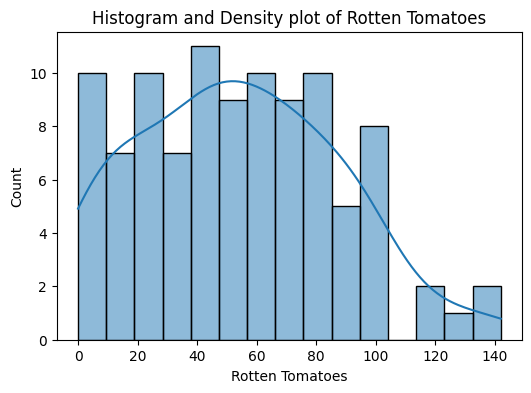

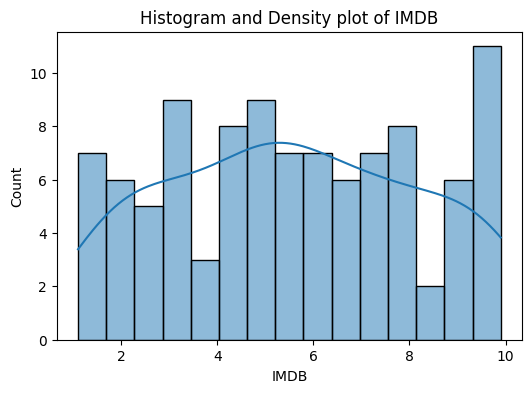

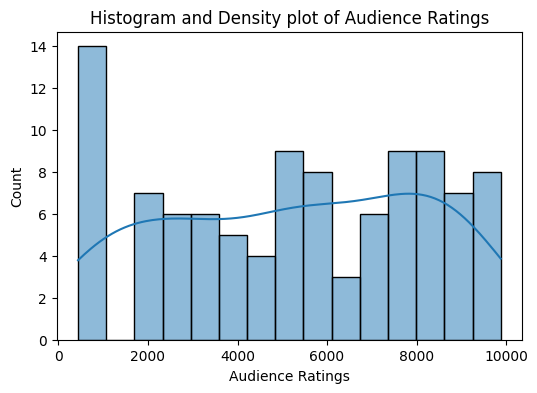

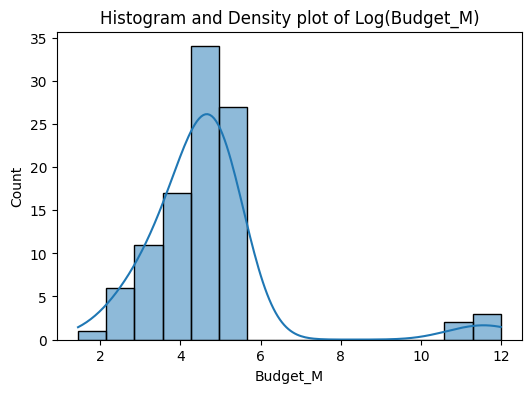

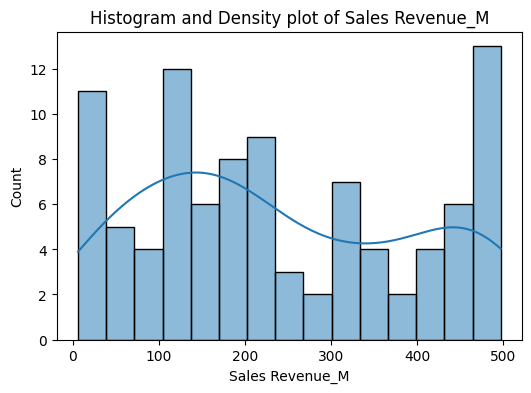

In [10]:
df_clean = df.dropna()

for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(6, 4))
    
    if col == 'Budget_M':
        # Applied log transformation to 'Budget_M as the scale kept forming a singular pillar'
        sns.histplot(np.log1p(df[col]), bins=15, kde=True)
        plt.title(f"Histogram and Density plot of Log({col})")
    else:
        sns.histplot(df[col], bins=15, kde=True)
        plt.title(f"Histogram and Density plot of {col}")

    plt.show()

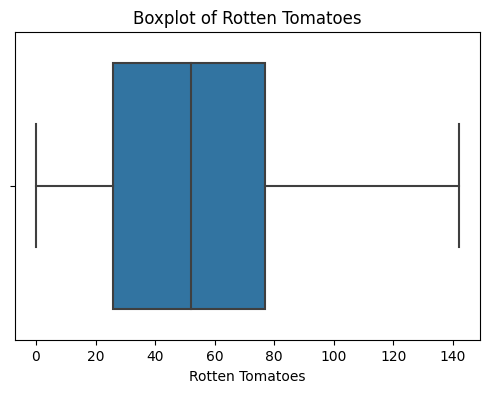

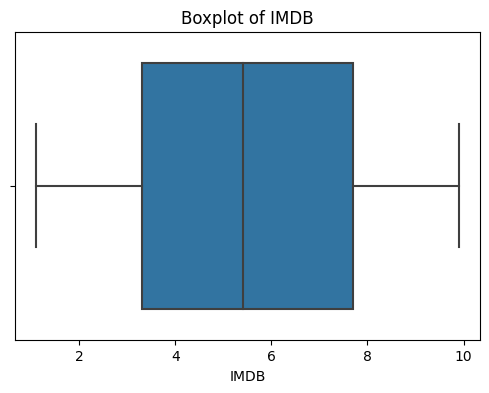

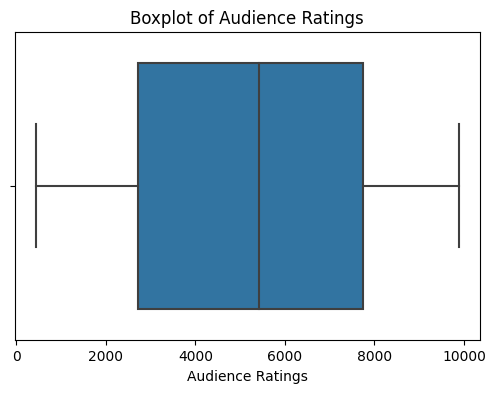

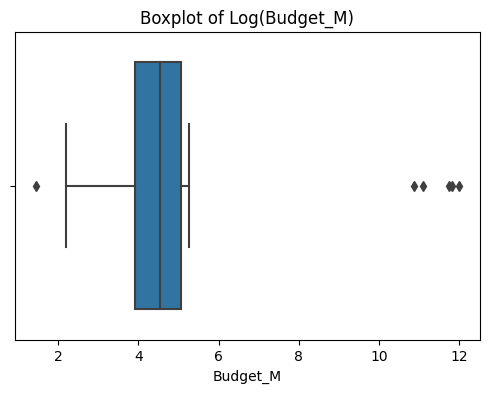

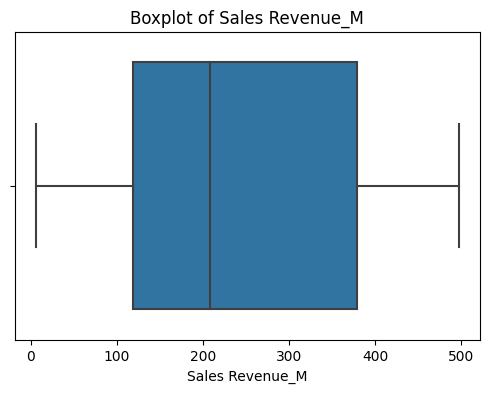

In [11]:
for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(6, 4))
    
    if col == 'Budget_M':
        # Apply log transformation only to 'Budget_M' as the scale was off and didn't form a proper boxplot
        sns.boxplot(x=np.log1p(df[col]))
        plt.title(f"Boxplot of Log({col})")
    else:
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")

    plt.show()

In [12]:
#Rotten Tomatoes looks like right-skewed distribution
#IMDB exhibit normal distribution
#audience rating looks like normal distrbution
#plot of Budget_M exhibit right Skewed

In [13]:
#Audience Ratings has the highest variability in the dataset due to its large dispersion in boxplot and low height of histogram plot

In [14]:
correlation_matrix = df.corr()
correlation_matrix

,Rotten Tomatoes,IMDB,Audience Ratings,Budget_M,Sales Revenue_M
Rotten Tomatoes,1.000000,-0.010546,-0.126204,-0.051246,-0.122929
IMDB,-0.010546,1.000000,0.126555,-0.053704,-0.041741
Audience Ratings,-0.126204,0.126555,1.000000,-0.111453,-0.011118
Budget_M,-0.051246,-0.053704,-0.111453,1.000000,0.030309
Sales Revenue_M,-0.122929,-0.041741,-0.011118,0.030309,1.000000


In [17]:
#   Highest negative and positve coorelation coefficient are -0.123 and 0.030. They both have weak relation with their 
#   associated variable. The negative weak coorelation coefficient between Sales Revenue_M and rotten tomatoes is -0.123
#   and positive weak coorelation coefficient between Sales Revenue_M and Budget_M is  0.030

In [18]:
# Having a higher budget does relate in some way in sales revenue. It may be the case that they can promote the movie on 
# multiple scale like poster, social media or have celebrities endorsement.

In [19]:
highest_sales_genre = df.groupby('Genre')['Sales Revenue_M'].mean().idxmax()
print(f"The genre with the highest average sales revenue is '{highest_sales_genre}'.")

The genre with the highest average sales revenue is 'Comedy'.


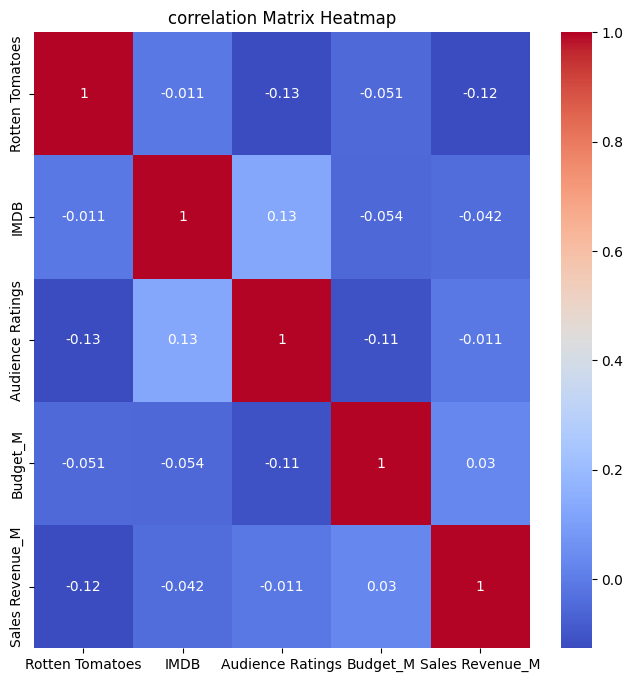

In [20]:
plt.figure(figsize=(8,8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('correlation Matrix Heatmap')
plt.show()

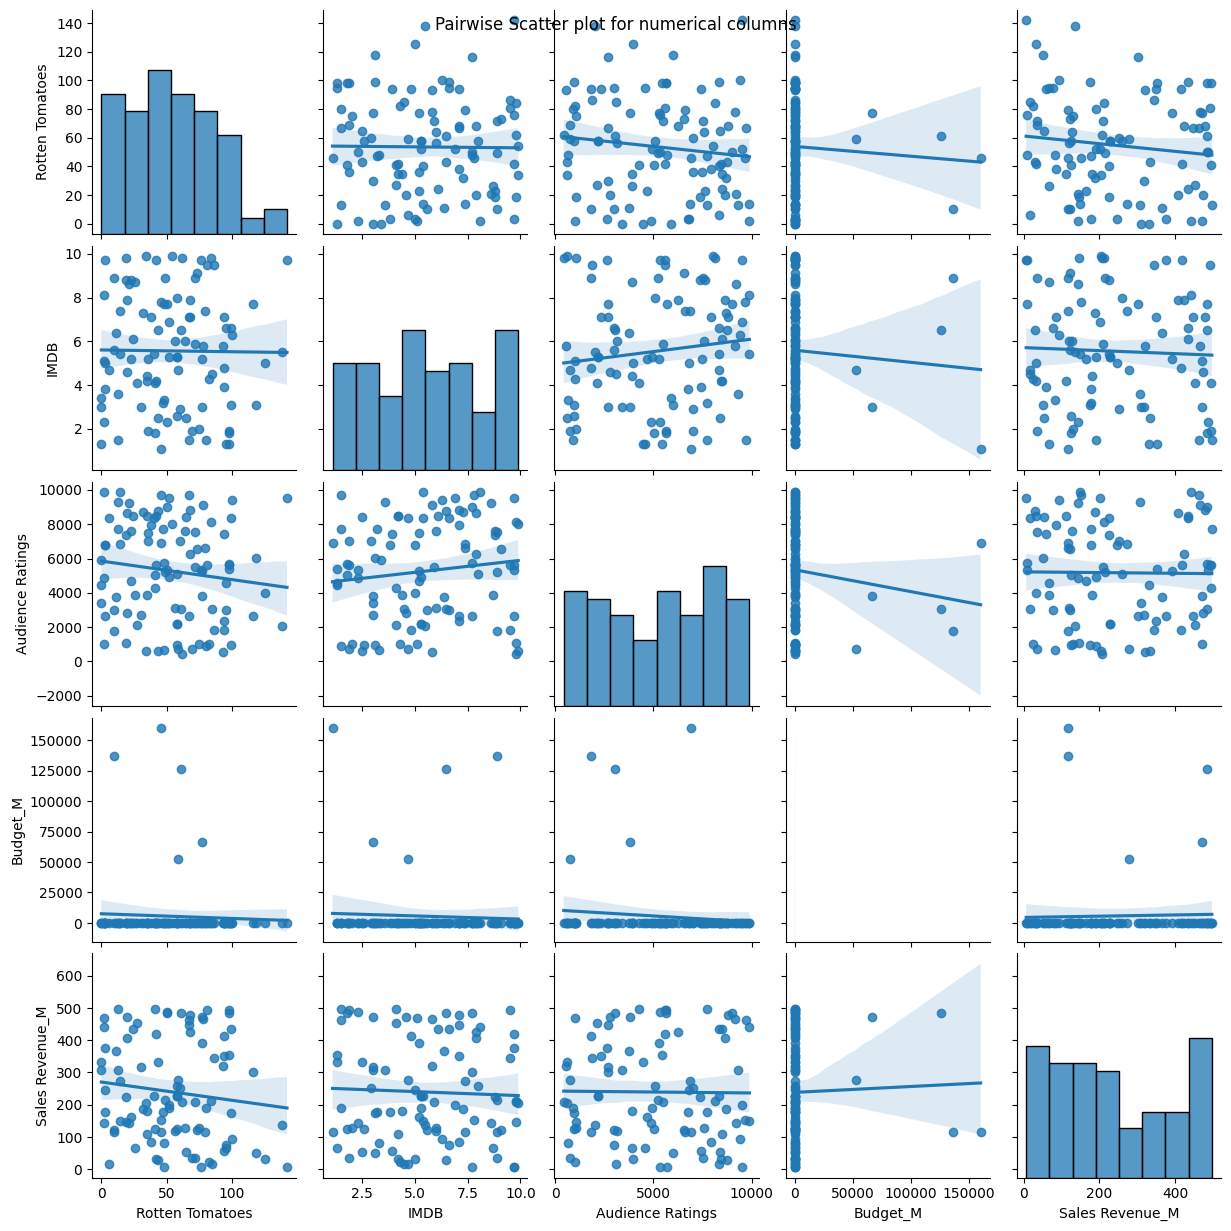

In [21]:
sns.pairplot(df.select_dtypes(include=['number']), kind='reg')
plt.suptitle("Pairwise Scatter plot for numerical columns")
plt.show()

In [23]:
Missing_Values = pd.DataFrame.isnull(df)
print(pd.DataFrame.sum(Missing_Values))
print('_____________________________________')

Dropping_Missing_values = df.dropna( )

print(pd.DataFrame.sum(pd.DataFrame.isnull(Dropping_Missing_values)))

Genre               0
Rotten Tomatoes     0
IMDB                0
Audience Ratings    0
Budget_M            0
Sales Revenue_M     5
Year of Release     0
dtype: int64
_____________________________________
Genre               0
Rotten Tomatoes     0
IMDB                0
Audience Ratings    0
Budget_M            0
Sales Revenue_M     0
Year of Release     0
dtype: int64


In [24]:
df.loc[df['Rotten Tomatoes']>100]=None
df.loc[df['IMDB']>10]=None
df[pd.to_numeric(df['Year of Release'], errors='coerce').notnull()]

,Genre,Rotten Tomatoes,IMDB,Audience Ratings,Budget_M,Sales Revenue_M,Year of Release
1,Romance,84.0,9.8,8150.0,28.243154,212.016126,2013
2,SciFi,75.0,2.0,1040.0,164.601429,129.342033,2017
3,Action,68.0,7.9,6250.0,38.779734,424.519154,2019
4,Thriller,6.0,4.7,8356.0,102.752477,16.652313,2012
5,Thriller,68.0,7.1,8798.0,45.639089,479.491361,2013
...,...,...,...,...,...,...,...
96,SciFi,52.0,5.3,4950.0,163.289240,191.404030,2019
97,Thriller,67.0,7.1,2665.0,32.723478,447.692942,2002
98,Sci-Fi,61.0,6.5,3057.0,126150.789400,483.897336,1999
99,Horror,14.0,7.4,6838.0,80.288417,273.442451,1985


In [25]:
duplicates = df.duplicated().sum()
print("Number of Duplicated Records:", duplicates)

df = df.drop_duplicates()

Number of Duplicated Records: 5
